#### Fetching Rick and Morty sitcom characters data from 'https://rickandmortyapi.com/documentation' API

In [1]:
import pandas as pd
import requests

In [2]:
url = "https://rickandmortyapi.com/api/character"

In [3]:
# Total number of pages
try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()
except requests.RequestException as e:
    raise SystemExit(f"Initial request failed: {e}")

data = response.json()
total_pages = data["info"]["pages"]
print(f"Total pages: {total_pages}")

Total pages: 42


In [4]:
# Function to fetch data from a given page
def fetch_characters_data(page):
    """
    This fucntion fetches characters data for a single page from the Rick and Morty API.
    Returns a list of dictionaries.
    """
    try:
        response = requests.get(url, params={"page": page}, timeout=10)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"\nRequest failed for page {page}: {e}")
        return []

    results = response.json()["results"]
    character_list = []
    for item in results:
        character_dict = {
            "id": item["id"],
            "Name" : item["name"],
            "Status": item["status"], 
            "Species": item["species"],
            "Type": item["type"],
            "Gender": item["gender"],
            "Origin": item["origin"]["name"],
            "Location":item["location"]["name"],
            "Image": item["image"],
            "No_of_episode": len(item["episode"])}
        character_list.append(character_dict)

    return character_list

In [5]:
# Loop through all pages and collecting data in a list
# This loop goes to each page
df = pd.DataFrame()
for i in range(1, total_pages + 1):
    print(i, end=", ")
    df_temp = pd.DataFrame(fetch_characters_data(i))
    df = pd.concat([df,df_temp], ignore_index=True)

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 

In [6]:
df.head()

,id,Name,Status,Species,Type,Gender,Origin,Location,Image,No_of_episode
0,1,Rick Sanchez,Alive,Human,,Male,Earth (C-137),Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,51
1,2,Morty Smith,Alive,Human,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,51
2,3,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,42
3,4,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,42
4,5,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,39


### Simple Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             826 non-null    int64 
 1   Name           826 non-null    object
 2   Status         826 non-null    object
 3   Species        826 non-null    object
 4   Type           826 non-null    object
 5   Gender         826 non-null    object
 6   Origin         826 non-null    object
 7   Location       826 non-null    object
 8   Image          826 non-null    object
 9   No_of_episode  826 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 64.7+ KB


In [8]:
df.shape

(826, 10)

In [9]:
df.columns

Index(['id', 'Name', 'Status', 'Species', 'Type', 'Gender', 'Origin',
       'Location', 'Image', 'No_of_episode'],
      dtype='object')

In [10]:
### Simple analysis of Species column

In [11]:
species = df["Species"].value_counts()
species

Species
Human                    366
Alien                    205
Humanoid                  68
Animal                    55
Robot                     51
Mythological Creature     46
unknown                   13
Poopybutthole              8
Cronenberg                 8
Disease                    6
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

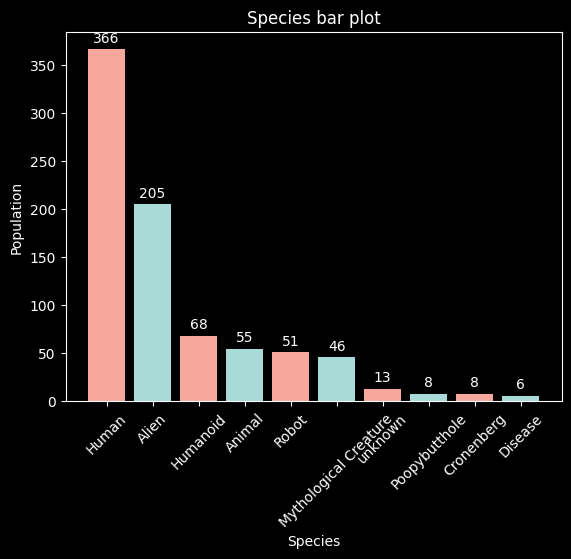

In [13]:
plt.style.use('dark_background')
# plt.figure(figsize=(6,4))
plt.bar(species.index, species.values, color = ["#f6a89c", "#a8dad7"])
plt.title("Species bar plot")
plt.xlabel("Species")
plt.ylabel("Population")

for i, v in enumerate(species.values):
    plt.text(i, v + (max(species.values) * 0.02),  # a small offset above the bar
             str(v),
             ha='center', color='white', fontsize=10)
    
plt.xticks(rotation = 45)
plt.show()

In [14]:
# df.to_csv('rick_morty_dataset.csv',index = False)